# Outlier detection and removal using percentile


In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/1_outliers/Exercise/AB_NYC_2019.csv")
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Null Handle**

In [3]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [4]:
null_values = df.reviews_per_month.mean()


In [6]:
null_values

1.3732214298586884

In [7]:
df.reviews_per_month = df.reviews_per_month.fillna(null_values)


In [11]:
df.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5586,4058949,3C. Private Rm in Guesthouse Manhattan,7831209,Bobi,Manhattan,East Harlem,40.80617,-73.93868,Private room,45,1,151,2019-05-09,2.59,10,357
23093,18701095,Crown Heights Haven,130013537,Ā.,Brooklyn,Crown Heights,40.67460,-73.94549,Private room,45,2,19,2018-07-06,0.73,1,0
47434,35733228,Relax comfortably 1BR w/AC in the Heart of Que...,268784513,Amit,Queens,East Elmhurst,40.75938,-73.88219,Private room,70,1,8,2019-07-07,8.00,3,342
15744,12733430,Bright & Spacious Studio,10777637,Andrea,Brooklyn,Williamsburg,40.71696,-73.95382,Entire home/apt,160,1,9,2016-09-26,0.24,1,0
40881,31795680,Recently Renovated 2 Bed Apartment In Williams...,3659285,Moshe,Brooklyn,Williamsburg,40.70787,-73.95501,Entire home/apt,160,1,22,2019-06-25,4.49,1,237


**Matplotlib Vizualization**

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline


<BarContainer object of 48895 artists>

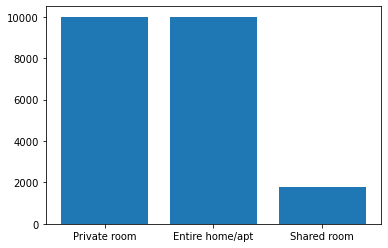

In [16]:
plt.bar(df['room_type'],df['price'])


<BarContainer object of 48895 artists>

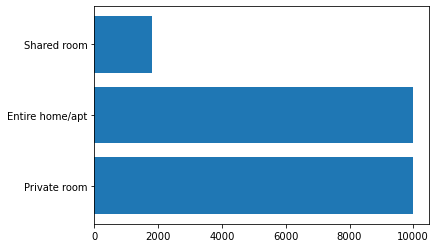

In [19]:
plt.barh(df['room_type'],df['price'])


In [20]:
df.price.describe()


count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

### Parcentile Model

In [21]:
min_thresold, max_thresold = df.price.quantile([0.01,0.999])
min_thresold, max_thresold

(30.0, 3000.0)

In [22]:
df[df.price<min_thresold]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
957,375249,Enjoy Staten Island Hospitality,1887999,Rimma & Jim,Staten Island,Graniteville,40.62109,-74.16534,Private room,20,3,80,2019-05-26,0.920000,1,226
2675,1428154,"Central, Peaceful Semi-Private Room",5912572,Tangier,Brooklyn,Flatbush,40.63899,-73.95177,Shared room,29,2,5,2014-10-20,0.070000,1,321
2860,1620248,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,NaN,1.373221,4,137
3020,1767037,Small Cozy Room Wifi & AC near JFK,9284163,Antonio,Queens,Woodhaven,40.68968,-73.85219,Private room,29,2,386,2019-06-19,5.530000,3,50
3918,2431607,"Bright, Airy Room Share for 2",4973668,Gloria,Brooklyn,Bedford-Stuyvesant,40.68642,-73.93440,Shared room,25,5,76,2019-06-06,1.220000,3,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48486,36280646,"Cable and wfi, L/G included.",272872092,Chris,Queens,Forest Hills,40.73657,-73.85088,Entire home/apt,16,9,1,2019-07-07,1.000000,1,322
48647,36354776,Cozy bedroom in diverse neighborhood near JFK,273393150,Liza,Queens,Richmond Hill,40.68639,-73.81847,Private room,28,2,0,NaN,1.373221,1,24
48832,36450814,FLATBUSH HANG OUT AND GO,267223765,Jarmel,Brooklyn,Flatbush,40.64922,-73.96078,Shared room,20,1,0,NaN,1.373221,3,363
48867,36473044,The place you were dreaming for.(only for guys),261338177,Diana,Brooklyn,Gravesend,40.59080,-73.97116,Shared room,25,1,0,NaN,1.373221,6,338


In [23]:
df0 = df[(df.price>min_thresold)&(df.price<max_thresold)]
df0.shape

(48183, 16)

In [25]:
df0.sample(5)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
14169,10904914,Room in Huge Union Sq Rooftop Apt!,56514111,Jenna,Manhattan,Chelsea,40.73860,-73.99775,Private room,70,1,2,2016-03-27,0.05,1,0
1279,550653,Sun Fill Room in a Spacious Apt,2706505,Huxley,Brooklyn,Windsor Terrace,40.65990,-73.98279,Private room,65,20,6,2018-09-30,0.32,1,311
1702,770960,Cozy 1 BR in Prospect Heights,4067211,Stephane & Hana,Brooklyn,Prospect Heights,40.67453,-73.96759,Entire home/apt,155,3,13,2016-04-21,0.16,1,0
27050,21399985,"Beautiful, Spacious & Comfortable NYC Brownstone",7658248,M,Manhattan,Harlem,40.80999,-73.95484,Private room,85,2,76,2019-06-13,3.68,2,0
37138,29517676,Spacious & Comfortable Suite w/ Private Entry/...,72001588,Dave,Staten Island,West Brighton,40.62625,-74.11109,Private room,80,1,29,2019-07-01,3.49,1,80


In [27]:
df0.price.describe()


count    48183.000000
mean       148.772036
std        153.594795
min         31.000000
25%         70.000000
50%        110.000000
75%        179.000000
max       2999.000000
Name: price, dtype: float64